<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (Custom Functions)

In [1]:
import numpy as np

In [2]:
def conv_no_stride(receptive_field, w, b):
    """
    Arguments:
    receptive_field: image field of shape (f, f, c)
    w: weight - tensor of shape (f, f, c)
    b: bias - tensor of shape (1, 1, 1)
    
    Returns:
    z: element-wise multiplication and summation (e.g., convolution)
    """

    # TO DO
    # 1. Element-wise multiplication NOT np.dot
    s = np.multiply(receptive_field, w)
    # 2. sum all data.
    z = np.sum(s)
    # 3. add bias
    z = z + float(b)
    ######

    return z

In [3]:
np.random.seed(1)
receptive_field = np.random.randn(5, 5, 3)
w = np.random.randn(5, 5, 3)
b = np.random.randn(1, 1, 1)

z = conv_no_stride(receptive_field, w, b)
assert z==3.1104032107031885

Convolutional layer output size

$$\frac{A−F+2P}{S}+1$$

, where $A$ is the layers height or width, $F$ is the filter's size, $P$ is the padding value, and $S$ the stride value.

In [4]:
def conv_forward(a, w, b, stride):
    """
    Arguments:
    a: the activations of the previous layer
    w: weights/filters
    b: biases
    stride: how much the filter is moved
        
    Returns:
    z: convolutional layer output
    """

    # get a shape
    m = a.shape[0] #batch size
    height = a.shape[1] #img height
    width = a.shape[2] #img width
    channels = a.shape[3] #img channels
    
    # get w shape
    f_h = w.shape[0] #filter height
    f_w = w.shape[1] #filter width
    f_c_prev = w.shape[2] #previous filter channels
    f_c = w.shape[3] #filter channels

    padding = 0 #for simplicity
    
    # TO DO 
    # compute the dimensions (out_height, out_width) of the conv output, Hint: use int() to floor the results
    out_height = int(int(height + 2*padding - f_h)/stride + 1)
    out_width = int(int(width + 2*padding - f_w)/stride + 1)
    
    # TO DO 
    # Initialize the output tensor z with zeros
    z = np.zeros((m, out_height, out_width, f_c))

    #TO DO
    #Apply convolutional operation using conv_no_stride function after you define the receptive field by
    # 1. looping over batch size
    # 2. looping over height (vertical axis)
    # 3. looping over width (horizontal axis)
    # 4. looping over channels (~depth)

    
    for i in range(m):                   # 1
        for hi in range(out_height):     # 2
            h_start = stride * hi
            h_end = h_start + f_h
            
            for wi in range(out_width):  # 3
                w_start = stride * wi
                w_end = w_start + f_w
                
                for c in range(f_c):     # 4   
                    receptive_field = a[i, h_start:h_end, w_start:w_end, :]
                    w_ = w[:, :, :, c]
                    b_ = b[:, :, :, c]
                    z[i, hi, wi, c] = conv_no_stride(receptive_field, w_, b_)
                                        
    ######
    
    return z

In [5]:
np.random.seed(0)
a = np.random.randn(20,28,15,3)
w = np.random.randn(3,4,3,8)
b = np.random.randn(1,1,1,8)
stride = 2

z = conv_forward(a, w, b,stride)
assert np.mean(z)==-0.29038666054049417

Pooling layer output size

$$\frac{A−P}{S}+1$$

, where A is the layers height or width, P is the pooling size, and S is the stride value.

In [6]:
def pooling_forward(a, p_h, p_w, stride, ptype = "max"):
    """
    Arguments:
    a: the activations of the previous layer
    p_h: pooling height
    p_w: pooling width
    stride: how much the pooling function is moved
    ptype: max or average pooling
        
    Returns:
    a_pooled: pooling layer output
    """
    
    # get a shape
    m = a.shape[0] #batch size
    height = a.shape[1] #img height
    width = a.shape[2] #img width
    channels = a.shape[3] #img channels
    
    # TO DO
    # define the dimensions of the output
    out_height = int((height - p_h) / stride + 1)
    out_width = int((width - p_w) / stride + 1)
    out_channels = channels
    
    # To DO 
    # initialize output tensor a
    a_out = np.zeros((m, out_height, out_width, out_channels))  

    #TO DO
    #Apply pooling operation
    # 1. loop over batch size
    # 2. loop over height (vertical axis)
    # 3. loop over widht (horizontal axis)
    # 4. loop over channels (~depth)  
        
    
    ### START CODE HERE ###
    for i in range(m):                         # 1
        for hi in range(out_height):           # 2
            h_start = stride * hi
            h_end = h_start + p_h

            for wi in range(out_width):        # 3
                w_start = stride * wi
                w_end = w_start + p_w
                
                for ci in range (out_channels): # 4
                    a_segm = a[i]
                    if ptype == "max":
                        a_out[i, hi, wi, ci] = np.max(a_segm[h_start:h_end, w_start:w_end, ci])
                    elif ptype == "average":
                        a_out[i, hi, wi, ci] = np.mean(a_segm[h_start:h_end, w_start:w_end, ci])
    
    ######
    
    return a_out

In [7]:
np.random.seed(0)
a = np.random.randn(3, 5, 5, 3)
print(a[0])
print()

a_out = pooling_forward(a, 2, 3, 2)
print("max")
print(a_out[0,0]) # should be [[2.2408932, 1.86755799, 0.97873798], [2.26975462, 1.53277921, 1.46935877]]
print()

a_out = pooling_forward(a, 2, 3, 2,  "average")
print("average")
print(a_out[0,0]) # should be [[ 1.04256576, 0.60346292, -0.60034531], [0.80965234, 0.17620185, 0.42797836]]
print()

[[[ 1.76405235  0.40015721  0.97873798]
  [ 2.2408932   1.86755799 -0.97727788]
  [ 0.95008842 -0.15135721 -0.10321885]
  [ 0.4105985   0.14404357  1.45427351]
  [ 0.76103773  0.12167502  0.44386323]]

 [[ 0.33367433  1.49407907 -0.20515826]
  [ 0.3130677  -0.85409574 -2.55298982]
  [ 0.6536186   0.8644362  -0.74216502]
  [ 2.26975462 -1.45436567  0.04575852]
  [-0.18718385  1.53277921  1.46935877]]

 [[ 0.15494743  0.37816252 -0.88778575]
  [-1.98079647 -0.34791215  0.15634897]
  [ 1.23029068  1.20237985 -0.38732682]
  [-0.30230275 -1.04855297 -1.42001794]
  [-1.70627019  1.9507754  -0.50965218]]

 [[-0.4380743  -1.25279536  0.77749036]
  [-1.61389785 -0.21274028 -0.89546656]
  [ 0.3869025  -0.51080514 -1.18063218]
  [-0.02818223  0.42833187  0.06651722]
  [ 0.3024719  -0.63432209 -0.36274117]]

 [[-0.67246045 -0.35955316 -0.81314628]
  [-1.7262826   0.17742614 -0.40178094]
  [-1.63019835  0.46278226 -0.90729836]
  [ 0.0519454   0.72909056  0.12898291]
  [ 1.13940068 -1.23482582  0.40

# Download dogs vs cats data
code used for downloading and cleaning the images (https://keras.io/examples/vision/image_classification_from_scratch/)

In [12]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   158M      0  0:00:04  0:00:04 --:--:--  160M


In [13]:
! mkdir dogs_cats
! unzip kagglecatsanddogs_3367a.zip  -d dogs_cats

Streaming output truncated to the last 5000 lines.
  inflating: dogs_cats/PetImages/Dog/5500.jpg  
  inflating: dogs_cats/PetImages/Dog/5501.jpg  
  inflating: dogs_cats/PetImages/Dog/5502.jpg  
  inflating: dogs_cats/PetImages/Dog/5503.jpg  
  inflating: dogs_cats/PetImages/Dog/5504.jpg  
  inflating: dogs_cats/PetImages/Dog/5505.jpg  
  inflating: dogs_cats/PetImages/Dog/5506.jpg  
  inflating: dogs_cats/PetImages/Dog/5507.jpg  
  inflating: dogs_cats/PetImages/Dog/5508.jpg  
  inflating: dogs_cats/PetImages/Dog/5509.jpg  
  inflating: dogs_cats/PetImages/Dog/551.jpg  
  inflating: dogs_cats/PetImages/Dog/5510.jpg  
  inflating: dogs_cats/PetImages/Dog/5511.jpg  
  inflating: dogs_cats/PetImages/Dog/5512.jpg  
  inflating: dogs_cats/PetImages/Dog/5513.jpg  
  inflating: dogs_cats/PetImages/Dog/5514.jpg  
  inflating: dogs_cats/PetImages/Dog/5515.jpg  
  inflating: dogs_cats/PetImages/Dog/5516.jpg  
  inflating: dogs_cats/PetImages/Dog/5517.jpg  
  inflating: dogs_cats/PetImages/Dog/5

In [14]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# use this to delete some corrupted images
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("dogs_cats/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


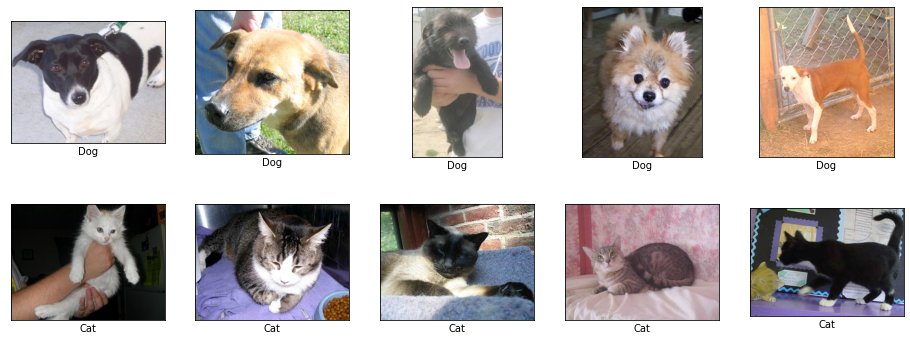

In [16]:
#plot few images
dogs_dir = 'dogs_cats/PetImages/Dog/'
cats_dir = 'dogs_cats/PetImages/Cat/'
classes = ['Dog', 'Cat']
cats_img = [im for im in os.listdir('dogs_cats/PetImages/Cat')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
dogs_img = [im for im in os.listdir('dogs_cats/PetImages/Dog')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
plt.figure(figsize=(16, 16))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    if i < 5:
      path = dogs_dir + dogs_img[i]
      plt.xlabel(classes[0])
    else:
      path = cats_dir + cats_img[i]
      plt.xlabel(classes[1])
    img = plt.imread(path)
    plt.imshow(img)

In [17]:
# convert images to 100x100x3 shape
images = []
labels = []
shape = 100, 100

for image in dogs_img:
    temp_img = cv2.imread(dogs_dir + image)
    temp_img = cv2.resize(temp_img, shape)
    images.append(temp_img.reshape(-1,))
    labels.append(0)

for image in cats_img:
    temp_img = cv2.imread(cats_dir + image)
    temp_img = cv2.resize(temp_img, shape)
    images.append(temp_img.reshape(-1,))
    labels.append(1)

In [18]:
#normalize images
images = np.array(images)
images = images.astype('float32')/255.0

In [19]:
#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(18728, 30000) (4682, 30000)


In [20]:
# reshape images from 30000 to 100x100x3
x_train = x_train.reshape(-1,100,100,3)
x_test = x_test.reshape(-1,100,100,3)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

num_classes = 2

model = Sequential()
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (100,100,3)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# output needs to be flattened before entering the Dense layer
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

In [26]:
model.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'], optimizer = "adam")

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)       

In [28]:
model.fit(x_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
586/586 [==============================] - 7s 11ms/step - loss: 0.7648 - accuracy: 0.5401 - val_loss: 0.6087 - val_accuracy: 0.6651
Epoch 2/30
586/586 [==============================] - 6s 10ms/step - loss: 0.5849 - accuracy: 0.6869 - val_loss: 0.5362 - val_accuracy: 0.7279
Epoch 3/30
586/586 [==============================] - 6s 10ms/step - loss: 0.5457 - accuracy: 0.7271 - val_loss: 0.5499 - val_accuracy: 0.7059
Epoch 4/30
586/586 [==============================] - 6s 10ms/step - loss: 0.5134 - accuracy: 0.7427 - val_loss: 0.4970 - val_accuracy: 0.7475
Epoch 5/30
586/586 [==============================] - 6s 10ms/step - loss: 0.4805 - accuracy: 0.7692 - val_loss: 0.4643 - val_accuracy: 0.7849
Epoch 6/30
586/586 [==============================] - 6s 10ms/step - loss: 0.4598 - accuracy: 0.7852 - val_loss: 0.4436 - val_accuracy: 0.7965
Epoch 7/30
586/586 [==============================] - 6s 10ms/step - loss: 0.4439 - accuracy: 0.7930 - val_loss: 0.4581 - val_accuracy: 0.7792

# American Sign Language

# TO DO 
Check AIDL_A02_ASL_01 for instructions